In [1]:
import pandas as pd
df=pd.DataFrame()

In [2]:
df = pd.read_csv('data_10000.csv',index_col='Date',parse_dates=True)

In [3]:
df.head()

,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2012-07-27,Product_0993,Whse_J,Category_028,100
2012-01-19,Product_0979,Whse_J,Category_028,500
2012-02-03,Product_0979,Whse_J,Category_028,500
2012-02-09,Product_0979,Whse_J,Category_028,500
2012-03-02,Product_0979,Whse_J,Category_028,500


In [4]:
df.isnull()

,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2012-07-27,False,False,False,False
2012-01-19,False,False,False,False
2012-02-03,False,False,False,False
2012-02-09,False,False,False,False
2012-03-02,False,False,False,False
...,...,...,...,...
2012-02-01,False,False,False,False
2012-02-02,False,False,False,False
2012-02-06,False,False,False,False


<AxesSubplot:xlabel='Date'>

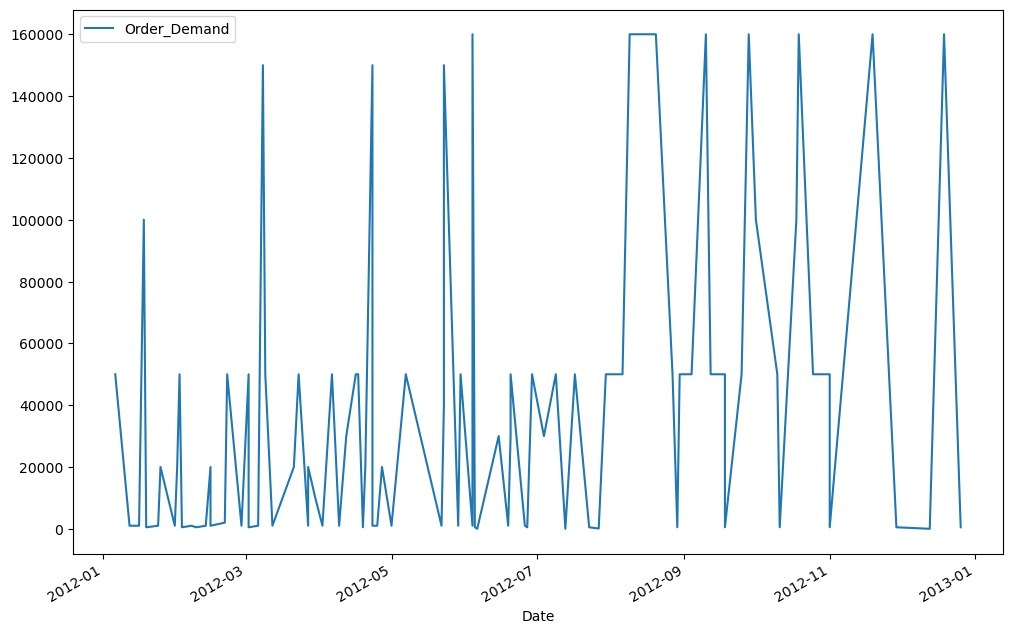

In [5]:
df[:100].plot(figsize=(12,8))

In [6]:
df['Sale_LastMonth']=df['Order_Demand'].shift(-1)
df['Sale_2Monthsback']=df['Order_Demand'].shift(-2)
df['Sale_3Monthsback']=df['Order_Demand'].shift(-3)

In [7]:
df=df.dropna()
df

,Product_Code,Warehouse,Product_Category,Order_Demand,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
Date,,,,,,,
2012-07-27,Product_0993,Whse_J,Category_028,100,500.0,500.0,500.0
2012-01-19,Product_0979,Whse_J,Category_028,500,500.0,500.0,500.0
2012-02-03,Product_0979,Whse_J,Category_028,500,500.0,500.0,500.0
2012-02-09,Product_0979,Whse_J,Category_028,500,500.0,500.0,500.0
2012-03-02,Product_0979,Whse_J,Category_028,500,500.0,500.0,500.0
...,...,...,...,...,...,...,...
2012-01-17,Product_1454,Whse_J,Category_019,300,1200.0,10000.0,5000.0
2012-01-24,Product_1289,Whse_J,Category_019,1200,10000.0,5000.0,20000.0
2012-01-25,Product_1378,Whse_J,Category_019,10000,5000.0,20000.0,1000.0


In [9]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [10]:
import numpy as np
x1,x2,x3,y=df['Sale_LastMonth'],df['Sale_2Monthsback'],df['Sale_3Monthsback'],df['Order_Demand']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[  500.   500.   500.]
 [  500.   500.   500.]
 [  500.   500.   500.]
 ...
 [ 5000. 20000.  1000.]
 [20000.  1000.  5000.]
 [ 1000.  5000.  1100.]]


In [11]:
X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]

In [12]:
lin_model.fit(X_train,y_train)

LinearRegression()

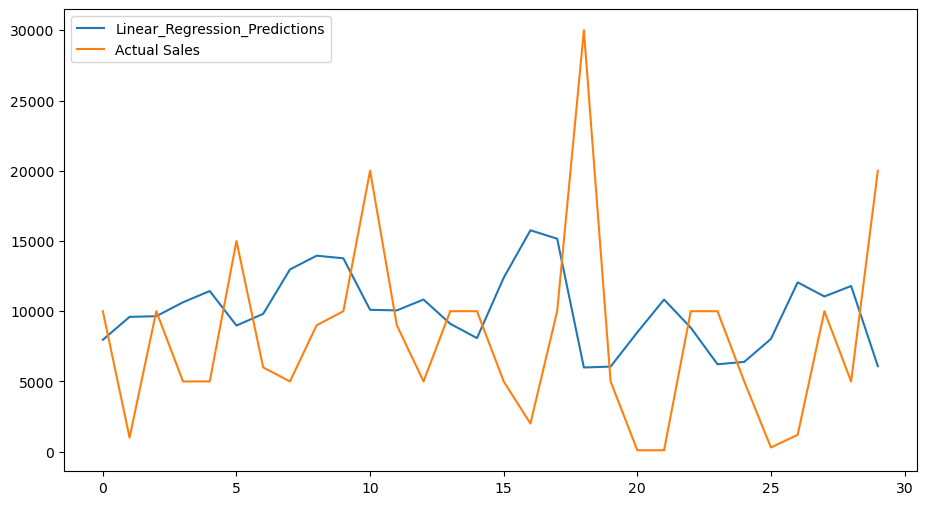

In [13]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [15]:
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Linear Regression Model is: 7982.139305057806
